# Post-impact parameters
Here we illustrate formulae that allow orbital parameters to be evaluated immediately following an impact event. The formalism is taken originally from Jackson et al. 2014, but is also used extensively in Veras et al. 2018. A link to the latter is provided here: https://arxiv.org/pdf/1802.04279.pdf
## Inclination
Firstly, let's consider the post-impact inclination. We consider the case where the impacted object is in a circular orbit, close to coplanar within its system. Thus the eccentricity, $e=0$, and the angle $\theta$ will be taken as close to 90 deg. 
As presented in Veras et al. 2018, we show the post-impact inclination as a function of the angle $\phi$, for several velocity ratios $\Delta{v}/v_\text{k}$. Without loss of generality, we take $f=0$, since there is thus far no way of knowing \textit(when) panspermia has happened within an exoplanetary system, if indeed it has at all.

Text(0.5, 0, '$\\phi [degrees]$')

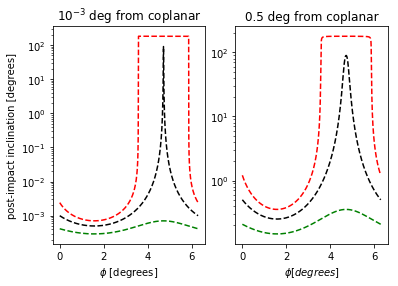

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

DEG_TO_RAD = np.pi / 180.
RAD_TO_DEG = 180. / np.pi

def post_inc(phi, e=0, f=0, theta=90, vel_ratio=1):
    """ 
    Calculate the post impact inclination I'
    """
    e_factor = np.sqrt(1 - e**2) / (1 + e*np.cos(f))
    H = 1 + 2*e_factor*vel_ratio*np.sin(theta)*np.sin(phi-f) + e_factor**2*vel_ratio**2*(np.cos(theta)**2 + np.sin(theta)**2*np.sin(phi-f)**2)
    cos_post_I = (1/np.sqrt(H))*(1 + e_factor*vel_ratio*np.sin(theta)*np.sin(phi-f))
    post_I = np.arccos(cos_post_I)
    
    return post_I*RAD_TO_DEG

vel_ratios = [np.sqrt(2)-1, 1, np.sqrt(2)+1] # min. to escape, middle case, max. to remain bound
theta = [(90 - 10**-3)*DEG_TO_RAD, (90 - 0.5)*DEG_TO_RAD] # two near-coplanar cases

phi = np.linspace(0, 2*np.pi, 10000)

fig, (ax1, ax2) = plt.subplots(1,2)

styles = ['g--', 'k--', 'r--']
for v, vr in enumerate(vel_ratios):
    ax1.plot(phi, post_inc(phi, theta=theta[0], vel_ratio=vr), styles[v])
    ax2.plot(phi, post_inc(phi, theta=theta[1], vel_ratio=vr), styles[v])

ax1.set_title('10$^{-3}$ deg from coplanar')
ax1.set_yscale('log')
ax1.set_xlabel('$\phi$ [degrees]')
ax1.set_ylabel('post-impact inclination [degrees]')
ax2.set_title('0.5 deg from coplanar')
ax2.set_yscale('log')
ax2.set_xlabel('$\phi [degrees]$')

## True Anomaly
Now we consider the post-impact true anomaly.

Text(0, 0.5, 'post-impact true anomaly [degrees]')

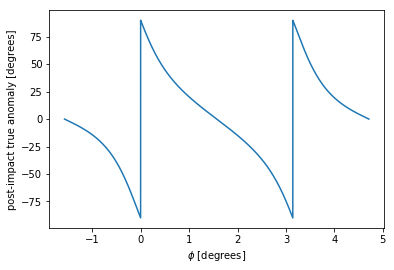

In [13]:
def post_f(phi, vel_ratio):
    """
    Calculate the post-impact true anomaly f'
    """
    tan_post_f = abs(1 + vel_ratio*np.sin(phi))*(1 / np.tan(phi)) / (2 + vel_ratio*np.sin(phi))
    post_f = np.arctan(tan_post_f)
    
    return post_f * RAD_TO_DEG

phi = np.linspace(-np.pi/2, 3*np.pi/2, 10000)

plt.plot(phi, post_f(phi, np.sqrt(2) - 1))

plt.xlabel('$\phi$ [degrees]')
plt.ylabel('post-impact true anomaly [degrees]')